# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Data visualization




*   **How many number of houses are related to different Point of Contacts**



<Axes: xlabel='Point of Contact', ylabel='count'>

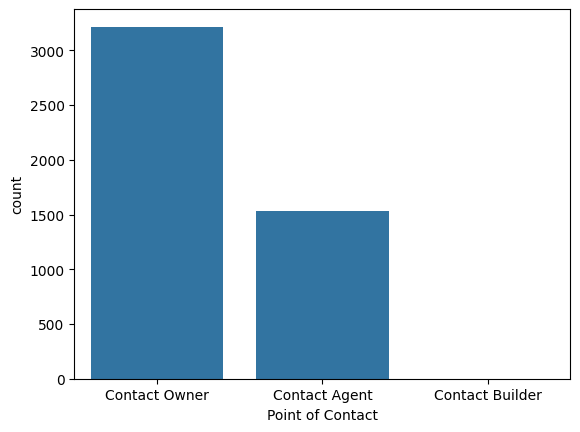

In [10]:
sns.countplot(x = 'Point of Contact', data = df)

*   **Furnished Status of Houses**

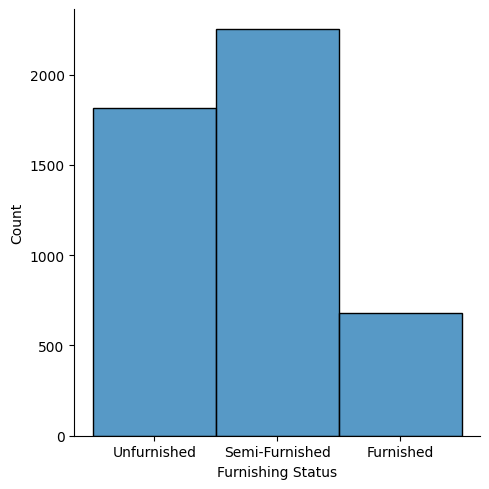

In [11]:
sns.displot(df['Furnishing Status'],)

# Feature Extraction

In [12]:
df_features = df[['BHK', 'Size', 'Floor',
    'Area Type', 'City', 'Furnishing Status',
    'Tenant Preferred', 'Bathroom','Point of Contact']]

In [13]:
y = df['Rent']

# Data Encoding

In [14]:
for i in df_features.columns:
    df_features[i] = LabelEncoder().fit_transform(df_features[i])

C:\Users\kamra\AppData\Local\Temp\ipykernel_7140\934235743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[i] = LabelEncoder().fit_transform(df_features[i])
C:\Users\kamra\AppData\Local\Temp\ipykernel_7140\934235743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[i] = LabelEncoder().fit_transform(df_features[i])
C:\Users\kamra\AppData\Local\Temp\ipykernel_7140\934235743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### Encoded data

In [15]:
df_features.head()
x = df_features

### Data splitting into Training and Testing sets

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Model Training

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Prediction

In [18]:
y_pred = model.predict(x_test[0:10])
print('Predicted values')
print('---------------------')
print(y_pred)
print('\n\nActuall values')
print('---------------------')
print(y_test[0:10])

Predicted values
---------------------
[ 25275.82898098 -26477.20969496 -11453.2065549   47588.07694132
  79340.17595449  15319.02762662  28881.95618968  90676.92567784
  97326.21452553 166810.32099756]


Actuall values
---------------------
2582      9500
3810      9000
4177      5500
2877     28000
3252     25000
2725     11000
3889      9500
2375     65000
2668     35000
1449    230000
Name: Rent, dtype: int64


### Model Evaluation

In [19]:
print('Mean Absolute error:', mean_absolute_error(y_test[0:10], y_pred))

Mean Absolute error: 31702.830114876666
